In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools

# SVT 2025 Matching Results Data Analysis

This notebook is meant to analyse the results of SVT 2025 Tutor-Student pairings with the tutor's survey responses post-tutoring.

This first section would add identifiers to the tutors and students to make it easily identifiable in the program. Ideally this would only be run ONCE since the IDS would be hardcoded in the other files (for convenience sake)


In [2]:
with open('tutor_student_details.json', 'r', encoding='utf8') as f:
    data = json.load(f)

tutor_counter = 1
student_counter = 1

for person in data:
    if "ID" not in person:
        if person["Type"] == "tutor":
            person["ID"] = f"T{tutor_counter:03d}"
            tutor_counter += 1
        elif person["Type"] == "student":
            person["ID"] = f"S{student_counter:03d}"
            student_counter += 1

with open('tutor_student_details.json', 'w', encoding='utf8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)

In [3]:
for person in data:
    if person["Type"] == "tutor":
        print(f'{person["Name"]}: {person.get("ID", "No ID assigned")}')

Raymund Sison: T001
Luis Miguel Antonio Razon: T002
BORJA, Jacob M: T003
Kevin Matthew Panuelos: T004
Leon Antonio C. Besar: T005
Bianca Clarizze Sollesta: T006
Bea Claire Sollesta: T007
Axl Roel Andaya: T008


In [36]:
for person in data:
    if person["Type"] == "student":
        print(f'{person["Name"]}: {person.get("ID", "No ID assigned")}')

Alab, Precious Pearl: S001
Alcoran, Mark Jhei: S002
Alviar, Loissah Mharie: S003
Baloaloa, Akhira Charlotte: S004
Capillano, Mhigz Genrei: S005
Llanto, Didrei Keira: S006
Moslares, Khim Steffi: S007
Orain, Mark Angelo: S008
Panaguiton, Lei Janrey: S009
Panopio, Kyrie Caleb: S010
Poblete, Erica: S011


This section will calculate the closeness score of each pair, taken from Pianta (2001)

In [37]:
responses_df = pd.read_csv("SVT2025_tutor_responses.csv")

# Closeness survey columns start and end
closeness_start = 10
closeness_end = 19

In [38]:
responses_df.head(5)

,Timestamp,Email Address,Tutor's Name,Tutor ID,Student's Name,Student ID,Similarity,Tutoring/Teaching experience (before SVT 2025),Tutor’s Initial Knowledge of Pairing Criteria,"I share an affectionate, warm relationship with this child",...,This child openly shares his/her feelings and experiences with me,My interactions with this child make me feel effective and confident,How would you describe your relationship with your matched student?,"In what ways do you think your personality affected your relationship with the student, if any?","In what ways do you think your learning style affected your relationship with the student, if any?",How would you describe your typical teaching style throughout the tutoring program? Also include specific methods you used and why they did or did not work.,What other factors do you think influenced your relationship with the student?,What other factors do you think affected the student’s learning experience?,Do you think you and your student were a good match? Why or why not?,How would you evaluate the overall quality of the student’s learning throughout the pairing?
0,7/3/2025 13:35:03,kevin.panuelos@gmail.com,Kevin Panuelos,T004,Erica Poblete,S011,0.9301,No Experience,Academic performance level (grades and class r...,4,...,5,4,I think I set a boundary but nevertheless I tr...,I crack a few jokes that landed for her and he...,We are definitely in sync with needing visuals...,Generally speaking I’m heavy on examples and d...,I can’t really identify anything further here,Providing constant validation to the student i...,I think we were. I had apprehensions at first ...,I sense she really took to the newer lessons v...
1,7/3/2025 13:48:12,jacob_borja@dlsu.edu.ph,Jacob Borja,T003,Mark Orain,S008,0.9067,1 - 2 Years,"Big Five personality profile, VARK learning-st...",4,...,4,4,It took some time for us to be comfortable wit...,I think that my patience allowed him to consta...,My learning style primarily focused on multipl...,It primarily focuses on small demonstrations a...,Parents and guardians were very supportive of him,Homework and his own initiative to learn the l...,I think so because my style relies on repetiti...,I would give it a 3/5 overall since he still h...
2,7/3/2025 14:16:49,kevin.panuelos@gmail.com,Kevin Panuelos,T004,Kyrie Caleb Panopio,S010,0.9186,No Experience,Academic performance level (grades and class r...,3,...,2,3,"Our dynamic at the start felt quite good, but ...",I think he was really receptive to praise espe...,Looks like we are both visual learners and I p...,I tend to solve problems and demonstrate them ...,I think we would've had a better runway if we ...,"At the latter part of the sessions, his attent...",I think the match was still good; especially h...,I think he definitely improved but not as dram...
3,7/12/2025 0:29:07,raymund.sison@dlsu.edu.ph,Raymund Sison,T001,Didrei Llanto,S006,0.9471,5+ Years,"Big Five personality profile, VARK learning-st...",4,...,4,4,I'd say it was a typical teacher-student relat...,"I'm not sure what my BFI results were, but I t...",Reading is my main mode of learning. I'm not s...,I think that students learn more when they're ...,Age: Our age difference probably reinforced my...,The insufficiency of her knowledge of the prer...,I'm not sure. But it certainly was not a bad m...,I think she benefited from the monthlong tutor...
4,7/12/2025 0:43:01,raymund.sison@dlsu.edu.ph,Raymund Sison,T001,Lei Panaguiton,S009,0.9577,5+ Years,"Big Five personality profile, VARK learning-st...",4,...,4,4,I'd say it was a typical teacher-student relat...,This tutee might be an extrovert. I'm an intro...,Reading is my main mode of learning. I'm not s...,I think that students learn more when they're ...,Age: Our age difference probably reinforced my...,The tutee might have issues with attention.,"I think so. Compared to my other tutee, this t...",I think he benefited from the monthlong tutoring.


In [39]:
closeness_cols = [f'{i}' for i in range(closeness_start, closeness_end + 1)]
closeness_data = responses_df.iloc[:, closeness_start - 1:closeness_end]
closeness_data.head(5)

,"I share an affectionate, warm relationship with this child","If upset, this child will seek comfort from me",This child values his/her relationship with me,"When I praise this child, he/she beams with pride",This child spontaneously shares information about himself/herself,This child tries to please me,It is easy to be in tune with what this child is feeling,I've noticed this child copying my behavior or ways of doing things,This child openly shares his/her feelings and experiences with me,My interactions with this child make me feel effective and confident
0,4,1,3,5,2,2,4,3,5,4
1,4,2,4,4,1,4,4,2,4,4
2,3,1,3,4,2,2,4,3,2,3
3,4,3,4,4,3,3,3,3,4,4
4,4,4,4,5,4,4,3,3,4,4


In [40]:
responses_df["Closeness Score"] = closeness_data.sum(axis=1)
responses_df[["Tutor ID", "Student ID", "Closeness Score"]].head(5)

,Tutor ID,Student ID,Closeness Score
0,T004,S011,33
1,T003,S008,33
2,T004,S010,27
3,T001,S006,35
4,T001,S009,39


Compile all the necessary data into one dataframe

In [41]:
# All of the columns for the new DF
overall_columns = ["Tutor ID", "Student ID", "Closeness Score", "Tutor BFI", "Student BFI", "Tutor VARK", "Student VARK", "Tutoring Experience", "Similarity"]

# Separate tutor and student data with ID as lookup
tutor_info = {person["ID"]: person for person in data if person["Type"] == "tutor"}
student_info = {person["ID"]: person for person in data if person["Type"] == "student"}

In [42]:
compiled_rows = []
for _, row in responses_df.iterrows():
    tutor_id = row["Tutor ID"]
    student_id = row["Student ID"]

    tutor = tutor_info.get(tutor_id)
    student = student_info.get(student_id)

    if tutor and student:
        compiled_rows.append({
            "Tutor ID": tutor_id,
            "Student ID": student_id,
            "Closeness Score": row["Closeness Score"],
            "Tutor BFI": tutor["BFI Results"],
            "Student BFI": student["BFI Results"],
            "Tutor VARK": tutor["VARK Results"],
            "Student VARK": student["VARK Results"],
            "Tutoring Experience": row["Tutoring/Teaching experience (before SVT 2025)"],
            "Similarity": row["Similarity"]
        })

match_data_df = pd.DataFrame(compiled_rows)
match_data_df.head(5)

,Tutor ID,Student ID,Closeness Score,Tutor BFI,Student BFI,Tutor VARK,Student VARK,Tutoring Experience,Similarity
0,T004,S011,33,"{'Openness': 3.5, 'Conscientiousness': 4.0, 'E...","{'Openness': 3.25, 'Conscientiousness': 4.0, '...","{'V': 11, 'A': 8, 'R': 3, 'K': 15}","{'V': 3, 'A': 5, 'R': 4, 'K': 4}",No Experience,0.9301
1,T003,S008,33,"{'Openness': 3.25, 'Conscientiousness': 3.75, ...","{'Openness': 2.5, 'Conscientiousness': 2.5, 'E...","{'V': 10, 'A': 10, 'R': 0, 'K': 14}","{'V': 5, 'A': 3, 'R': 4, 'K': 4}",1 - 2 Years,0.9067
2,T004,S010,27,"{'Openness': 3.5, 'Conscientiousness': 4.0, 'E...","{'Openness': 3.5, 'Conscientiousness': 3.25, '...","{'V': 11, 'A': 8, 'R': 3, 'K': 15}","{'V': 2, 'A': 9, 'R': 3, 'K': 8}",No Experience,0.9186
3,T001,S006,35,"{'Openness': 4.5, 'Conscientiousness': 4.5, 'E...","{'Openness': 4.75, 'Conscientiousness': 4.0, '...","{'V': 13, 'A': 5, 'R': 15, 'K': 6}","{'V': 9, 'A': 0, 'R': 6, 'K': 1}",5+ Years,0.9471
4,T001,S009,39,"{'Openness': 4.5, 'Conscientiousness': 4.5, 'E...","{'Openness': 3.0, 'Conscientiousness': 2.75, '...","{'V': 13, 'A': 5, 'R': 15, 'K': 6}","{'V': 6, 'A': 5, 'R': 9, 'K': 8}",5+ Years,0.9577


Export the compiled data for later use

In [43]:
# Export to CSV
match_data_df.to_csv("SVT2025_merged.csv", index=False)

Import data

In [3]:
# Import CSV to DataFrame
match_data_df = pd.read_csv("SVT2025_merged.csv")

Pre-process imported data

In [4]:
# Pre-process the CSV
match_data_df.head(5)

,Tutor ID,Student ID,Closeness Score,Tutor BFI,Student BFI,Tutor VARK,Student VARK,Tutoring Experience,Similarity
0,T004,S011,33,"{'Openness': 3.5, 'Conscientiousness': 4.0, 'E...","{'Openness': 3.25, 'Conscientiousness': 4.0, '...","{'V': 11, 'A': 8, 'R': 3, 'K': 15}","{'V': 3, 'A': 5, 'R': 4, 'K': 4}",No Experience,0.9301
1,T003,S008,33,"{'Openness': 3.25, 'Conscientiousness': 3.75, ...","{'Openness': 2.5, 'Conscientiousness': 2.5, 'E...","{'V': 10, 'A': 10, 'R': 0, 'K': 14}","{'V': 5, 'A': 3, 'R': 4, 'K': 4}",1 - 2 Years,0.9067
2,T004,S010,27,"{'Openness': 3.5, 'Conscientiousness': 4.0, 'E...","{'Openness': 3.5, 'Conscientiousness': 3.25, '...","{'V': 11, 'A': 8, 'R': 3, 'K': 15}","{'V': 2, 'A': 9, 'R': 3, 'K': 8}",No Experience,0.9186
3,T001,S006,35,"{'Openness': 4.5, 'Conscientiousness': 4.5, 'E...","{'Openness': 4.75, 'Conscientiousness': 4.0, '...","{'V': 13, 'A': 5, 'R': 15, 'K': 6}","{'V': 9, 'A': 0, 'R': 6, 'K': 1}",5+ Years,0.9471
4,T001,S009,39,"{'Openness': 4.5, 'Conscientiousness': 4.5, 'E...","{'Openness': 3.0, 'Conscientiousness': 2.75, '...","{'V': 13, 'A': 5, 'R': 15, 'K': 6}","{'V': 6, 'A': 5, 'R': 9, 'K': 8}",5+ Years,0.9577


In [5]:
# Convert dictionary strings into real dictionaries
match_data_df["Tutor BFI"] = match_data_df["Tutor BFI"].apply(eval)
match_data_df["Student BFI"] = match_data_df["Student BFI"].apply(eval)
match_data_df["Tutor VARK"] = match_data_df["Tutor VARK"].apply(eval)
match_data_df["Student VARK"] = match_data_df["Student VARK"].apply(eval)

Expand the dictionaries

In [6]:
# Expand dictionaries
def expand_dict_column(df, column, prefix):
    expanded = df[column].apply(pd.Series)
    expanded.columns = [f"{prefix}_{c}" for c in expanded.columns]
    return expanded

match_data_df_flat = pd.concat([
    match_data_df.drop(columns=["Tutor BFI", "Student BFI", "Tutor VARK", "Student VARK"]),
    expand_dict_column(match_data_df, "Tutor BFI", "Tutor_BFI"),
    expand_dict_column(match_data_df, "Student BFI", "Student_BFI"),
    expand_dict_column(match_data_df, "Tutor VARK", "Tutor_VARK"),
    expand_dict_column(match_data_df, "Student VARK", "Student_VARK")
], axis=1)

match_data_df_flat.head(5)

,Tutor ID,Student ID,Closeness Score,Tutoring Experience,Similarity,Tutor_BFI_Openness,Tutor_BFI_Conscientiousness,Tutor_BFI_Extroversion,Tutor_BFI_Agreeableness,Tutor_BFI_Neuroticism,...,Student_BFI_Agreeableness,Student_BFI_Neuroticism,Tutor_VARK_V,Tutor_VARK_A,Tutor_VARK_R,Tutor_VARK_K,Student_VARK_V,Student_VARK_A,Student_VARK_R,Student_VARK_K
0,T004,S011,33,No Experience,0.9301,3.50,4.00,2.25,3.5,3.75,...,4.25,4.25,11,8,3,15,3,5,4,4
1,T003,S008,33,1 - 2 Years,0.9067,3.25,3.75,3.25,4.0,3.25,...,4.00,1.75,10,10,0,14,5,3,4,4
2,T004,S010,27,No Experience,0.9186,3.50,4.00,2.25,3.5,3.75,...,2.75,4.25,11,8,3,15,2,9,3,8
3,T001,S006,35,5+ Years,0.9471,4.50,4.50,3.00,4.0,2.75,...,4.00,4.25,13,5,15,6,9,0,6,1
4,T001,S009,39,5+ Years,0.9577,4.50,4.50,3.00,4.0,2.75,...,3.25,2.75,13,5,15,6,6,5,9,8


In [7]:
# Map tutoring experience
exp_map = {
    "No Experience": 0,
    "Less than 1 Year": 1,
    "1 - 2 Years": 2,
    "3 - 5 Years": 3,
    "5+ Years": 4
}
match_data_df_flat["Tutoring Experience"] = match_data_df_flat["Tutoring Experience"].map(exp_map)
match_data_df_flat.head(5)

,Tutor ID,Student ID,Closeness Score,Tutoring Experience,Similarity,Tutor_BFI_Openness,Tutor_BFI_Conscientiousness,Tutor_BFI_Extroversion,Tutor_BFI_Agreeableness,Tutor_BFI_Neuroticism,...,Student_BFI_Agreeableness,Student_BFI_Neuroticism,Tutor_VARK_V,Tutor_VARK_A,Tutor_VARK_R,Tutor_VARK_K,Student_VARK_V,Student_VARK_A,Student_VARK_R,Student_VARK_K
0,T004,S011,33,0,0.9301,3.50,4.00,2.25,3.5,3.75,...,4.25,4.25,11,8,3,15,3,5,4,4
1,T003,S008,33,2,0.9067,3.25,3.75,3.25,4.0,3.25,...,4.00,1.75,10,10,0,14,5,3,4,4
2,T004,S010,27,0,0.9186,3.50,4.00,2.25,3.5,3.75,...,2.75,4.25,11,8,3,15,2,9,3,8
3,T001,S006,35,4,0.9471,4.50,4.50,3.00,4.0,2.75,...,4.00,4.25,13,5,15,6,9,0,6,1
4,T001,S009,39,4,0.9577,4.50,4.50,3.00,4.0,2.75,...,3.25,2.75,13,5,15,6,6,5,9,8


Define independent variables

In [8]:
features = [c for c in match_data_df_flat.columns if "Tutor_" in c or "Student_" in c] + ["Similarity", "Tutoring Experience"]
features

['Tutor_BFI_Openness',
 'Tutor_BFI_Conscientiousness',
 'Tutor_BFI_Extroversion',
 'Tutor_BFI_Agreeableness',
 'Tutor_BFI_Neuroticism',
 'Student_BFI_Openness',
 'Student_BFI_Conscientiousness',
 'Student_BFI_Extroversion',
 'Student_BFI_Agreeableness',
 'Student_BFI_Neuroticism',
 'Tutor_VARK_V',
 'Tutor_VARK_A',
 'Tutor_VARK_R',
 'Tutor_VARK_K',
 'Student_VARK_V',
 'Student_VARK_A',
 'Student_VARK_R',
 'Student_VARK_K',
 'Similarity',
 'Tutoring Experience']

Correlation matrix to see which variables have relationships or patters with Closeness Score

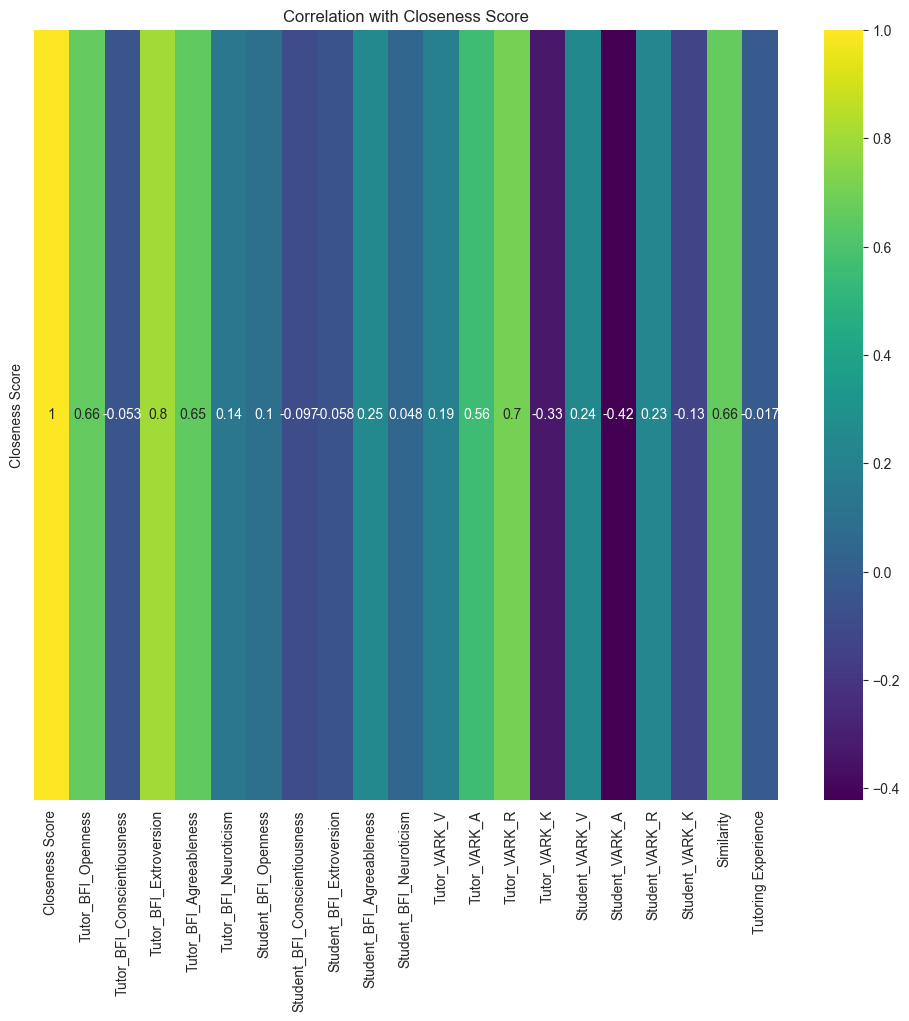

In [9]:
corr_matrix = match_data_df_flat[["Closeness Score"] + features].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[["Closeness Score"]].T, annot=True, cmap="viridis")
plt.title("Correlation with Closeness Score")
plt.show()

As we can see, Tutor Extroversion seems to have the highest positive correlation with closeness score. Tutor Openness, Tutor Agreeableness, Tutor Read/Write, and Similarity also have pretty high positive correlation with closeness score. Student auditory and Tutor Kinesthetic seems to have considerable negative correlation.

Single Linear Regression Exploring the relationship of the Closeness Score with BFI, VARK, Similarity, and Tutoring Experience

In [10]:
# Empty single_regression.txt
with open("single_regression.txt", "w") as f:
    f.write("Single Regression Analysis Results\n\n")

for col in features:
    X = sm.add_constant(match_data_df_flat[col])
    y = match_data_df_flat["Closeness Score"]
    model = sm.OLS(y, X).fit()
    print(f"--- {col} ---")
    print(model.summary())

    with open("single_regression.txt", "a") as f:
        f.write(f"--- {col} ---\n")
        f.write(model.summary().as_text() + "\n\n")


--- Tutor_BFI_Openness ---
                            OLS Regression Results                            
Dep. Variable:        Closeness Score   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     6.876
Date:                Thu, 24 Jul 2025   Prob (F-statistic):             0.0277
Time:                        01:20:25   Log-Likelihood:                -31.135
No. Observations:                  11   AIC:                             66.27
Df Residuals:                       9   BIC:                             67.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const    

C:\Users\Luis Razon\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)
C:\Users\Luis Razon\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)
C:\Users\Luis Razon\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)
C:\Users\Luis Razon\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate 


                            OLS Regression Results                            
Dep. Variable:        Closeness Score   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                 -0.053
Method:                 Least Squares   F-statistic:                    0.5002
Date:                Thu, 24 Jul 2025   Prob (F-statistic):              0.497
Time:                        01:20:25   Log-Likelihood:                -33.960
No. Observations:                  11   AIC:                             71.92
Df Residuals:                       9   BIC:                             72.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             34.0426      3.728      9

C:\Users\Luis Razon\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)
C:\Users\Luis Razon\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)
C:\Users\Luis Razon\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)
C:\Users\Luis Razon\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate 

Multiple Linear Regression Exploring the impact of multiple variables to the Closeness Score

In [11]:
X_multi = match_data_df_flat[features]
X_multi = sm.add_constant(X_multi)
y_multi = match_data_df_flat["Closeness Score"]

multi_model = sm.OLS(y_multi, X_multi).fit()
print(multi_model.summary())

with open("multiple_regression.txt", "w") as f:
    f.write("Multiple Regression Analysis Results\n\n")
    f.write(multi_model.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:        Closeness Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 24 Jul 2025   Prob (F-statistic):                nan
Time:                        01:20:25   Log-Likelihood:                 320.45
No. Observations:                  11   AIC:                            -618.9
Df Residuals:                       0   BIC:                            -614.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

C:\Users\Luis Razon\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)
C:\Users\Luis Razon\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Luis Razon\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Luis Razon\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_re

# Multiregression modelling

Null Hypothesis: The model is not a good predictor of Closeness Score

Alternative Hypothesis: The model is able to predict Closeness Score

In [12]:
multi_variable_results = []
# Limit duplicates
seen = set()

# There are 20 features... lets only test upto 5 combinations for now
# The total number of possible combinations of 20 items is 1,048,576.
# The total number of possible combinations of 20 items taken 5 at a time is 21,699.
for i in range(5 + 1):
    for combination in itertools.combinations(features, i):
        if len(combination) == 0:
            continue
        
        # Just in case
        combination_key = frozenset(sorted(list(combination)))
        if combination_key in seen:
            # print(f"Seen {combination}, skipping...")
            continue

        seen.add(combination_key)

        # print(f"Combination: {combination_key}")
        # selected_variables = sum([features[x] for x in combination], [])
        # print(f"Testing combination: {selected_variables}")
        # print(match_data_df_flat[list(combination)])

        X = sm.add_constant(match_data_df_flat[list(combination)])
        y = match_data_df_flat["Closeness Score"]

        model = sm.OLS(y, X).fit()

        # Filter certain factor combinations that are significant predictors of Closeness Score
        if (model.f_pvalue < 0.01):
            multi_variable_results.append({"Combination": list(combination), "Model": model})


In [13]:
len(multi_variable_results)

1749

In [14]:
# Sort results by model F-statistic p-value (ascending)
sorted_results = sorted(
    multi_variable_results,
    key=lambda x: x['Model'].f_pvalue
)

# Write results to text file
with open("multi_variable_results.txt", "w") as f:
    f.write("Multi Variable Regression Results\n\n")
    f.write("----------------------------------------------------------------------------\n\n\n")
    for result in sorted_results:
        f.write(f"Combination: {result["Combination"]}\n\n")
        f.write(result["Model"].summary().as_text())
        f.write("\n\n\n")

C:\Users\Luis Razon\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)
C:\Users\Luis Razon\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)
C:\Users\Luis Razon\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)
C:\Users\Luis Razon\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate 

# Analyzing results of regression analysis

## Individual characteristics

In [15]:
pd.set_option('display.max_colwidth', None)


In [16]:
# Getting the results of each model and appending it to a DataFrame
cleaned_results = []

for result in multi_variable_results:
    cleaned_results.append(
        {
            "Combination": result["Combination"],
            "F_PValue": result["Model"].f_pvalue,
            "Adj_R2": result["Model"].rsquared_adj,
        }
    )

In [17]:
cleaned_results_df = pd.DataFrame(cleaned_results)
cleaned_results_df.head(5)

,Combination,F_PValue,Adj_R2
0,[Tutor_BFI_Extroversion],0.002887,0.606266
1,"[Tutor_BFI_Openness, Tutor_BFI_Extroversion]",0.007563,0.631376
2,"[Tutor_BFI_Openness, Tutor_BFI_Agreeableness]",0.003574,0.694376
3,"[Tutor_BFI_Openness, Student_BFI_Agreeableness]",0.005128,0.665498
4,"[Tutor_BFI_Extroversion, Tutor_BFI_Agreeableness]",0.002984,0.707850


In [18]:
# Top 10 Specific Combination of features with the highest Adj_R2
cleaned_results_df.sort_values(by="Adj_R2", ascending=False).head(10)

,Combination,F_PValue,Adj_R2
753,"[Tutor_BFI_Openness, Student_BFI_Openness, Tutor_VARK_A, Student_VARK_V, Similarity]",0.000037,0.982877
758,"[Tutor_BFI_Openness, Student_BFI_Conscientiousness, Student_BFI_Agreeableness, Student_VARK_R, Tutoring Experience]",0.000067,0.978131
1229,"[Tutor_BFI_Extroversion, Student_BFI_Openness, Student_VARK_V, Similarity, Tutoring Experience]",0.000074,0.977286
1599,"[Student_BFI_Openness, Student_BFI_Agreeableness, Tutor_VARK_A, Student_VARK_V, Similarity]",0.000105,0.973807
728,"[Tutor_BFI_Openness, Tutor_BFI_Neuroticism, Student_BFI_Agreeableness, Student_BFI_Neuroticism, Tutor_VARK_V]",0.000121,0.972284
1353,"[Tutor_BFI_Extroversion, Student_BFI_Extroversion, Student_VARK_A, Similarity, Tutoring Experience]",0.000148,0.969920
1232,"[Tutor_BFI_Extroversion, Student_BFI_Openness, Student_VARK_A, Similarity, Tutoring Experience]",0.000184,0.967209
729,"[Tutor_BFI_Openness, Tutor_BFI_Neuroticism, Student_BFI_Agreeableness, Student_BFI_Neuroticism, Tutor_VARK_A]",0.000202,0.965916
735,"[Tutor_BFI_Openness, Tutor_BFI_Neuroticism, Student_BFI_Agreeableness, Student_BFI_Neuroticism, Student_VARK_K]",0.000218,0.964852
1620,"[Student_BFI_Conscientiousness, Student_BFI_Agreeableness, Tutor_VARK_V, Tutor_VARK_K, Tutoring Experience]",0.000245,0.963149


In [19]:
# Top 10 Specific Combination of features with the Lowest F_PValue
cleaned_results_df.sort_values(by="F_PValue", ascending=True).head(10)

,Combination,F_PValue,Adj_R2
753,"[Tutor_BFI_Openness, Student_BFI_Openness, Tutor_VARK_A, Student_VARK_V, Similarity]",0.000037,0.982877
139,"[Tutor_BFI_Openness, Tutor_BFI_Neuroticism, Student_BFI_Agreeableness, Student_BFI_Neuroticism]",0.000054,0.959976
8,"[Tutor_BFI_Extroversion, Similarity]",0.000058,0.890872
758,"[Tutor_BFI_Openness, Student_BFI_Conscientiousness, Student_BFI_Agreeableness, Student_VARK_R, Tutoring Experience]",0.000067,0.978131
1229,"[Tutor_BFI_Extroversion, Student_BFI_Openness, Student_VARK_V, Similarity, Tutoring Experience]",0.000074,0.977286
1599,"[Student_BFI_Openness, Student_BFI_Agreeableness, Tutor_VARK_A, Student_VARK_V, Similarity]",0.000105,0.973807
39,"[Tutor_BFI_Extroversion, Student_BFI_Openness, Similarity]",0.000111,0.916333
728,"[Tutor_BFI_Openness, Tutor_BFI_Neuroticism, Student_BFI_Agreeableness, Student_BFI_Neuroticism, Tutor_VARK_V]",0.000121,0.972284
1353,"[Tutor_BFI_Extroversion, Student_BFI_Extroversion, Student_VARK_A, Similarity, Tutoring Experience]",0.000148,0.969920
58,"[Tutor_BFI_Extroversion, Similarity, Tutoring Experience]",0.000174,0.904605


## Categorized Characteristics (Generalized tutor and student bfi + vark)

In [20]:
# Checking for pattern in categories

categorized_results = []

for result in multi_variable_results:
    combination = result["Combination"]
    categories = set()
    for item in combination:
        if item.startswith("Tutor_BFI"):
            categories.add("Tutor BFI")
        
        if item.startswith("Student_BFI"):
            categories.add("Student BFI")
        
        if item.startswith("Tutor_VARK"):
            categories.add("Tutor VARK")
        
        if item.startswith("Student_VARK"):
            categories.add("Student VARK")
        
        if item == "Similarity":
            categories.add("Similarity")

        if item == "Tutoring Experience":
            categories.add("Tutoring Experience")

    categorized_results.append({
        "Combination": combination,
        "Categories": tuple(sorted(categories)),
        "F_PValue": result["Model"].f_pvalue,
        "Adj_R2": result["Model"].rsquared_adj,
    })

In [21]:
categorized_results_df = pd.DataFrame(categorized_results)
categorized_results_df.head(10)

,Combination,Categories,F_PValue,Adj_R2
0,[Tutor_BFI_Extroversion],"(Tutor BFI,)",0.002887,0.606266
1,"[Tutor_BFI_Openness, Tutor_BFI_Extroversion]","(Tutor BFI,)",0.007563,0.631376
2,"[Tutor_BFI_Openness, Tutor_BFI_Agreeableness]","(Tutor BFI,)",0.003574,0.694376
3,"[Tutor_BFI_Openness, Student_BFI_Agreeableness]","(Student BFI, Tutor BFI)",0.005128,0.665498
4,"[Tutor_BFI_Extroversion, Tutor_BFI_Agreeableness]","(Tutor BFI,)",0.002984,0.707850
5,"[Tutor_BFI_Extroversion, Student_BFI_Agreeableness]","(Student BFI, Tutor BFI)",0.007201,0.635865
6,"[Tutor_BFI_Extroversion, Student_BFI_Neuroticism]","(Student BFI, Tutor BFI)",0.006515,0.644874
7,"[Tutor_BFI_Extroversion, Tutor_VARK_R]","(Tutor BFI, Tutor VARK)",0.003856,0.688518
8,"[Tutor_BFI_Extroversion, Similarity]","(Similarity, Tutor BFI)",0.000058,0.890872
9,"[Tutor_BFI_Agreeableness, Tutor_VARK_V]","(Tutor BFI, Tutor VARK)",0.009705,0.607659


In [22]:
# Top 10 most common occuring category sets
pattern_counts = categorized_results_df["Categories"].value_counts()
pattern_counts.head(10)

Categories
(Similarity, Student BFI, Tutor BFI, Tutor VARK)                  212
(Similarity, Student VARK, Tutor BFI, Tutor VARK)                 189
(Similarity, Student BFI, Student VARK, Tutor BFI)                172
(Similarity, Student BFI, Tutor BFI)                              121
(Similarity, Student BFI, Student VARK, Tutor BFI, Tutor VARK)    114
(Similarity, Tutor BFI, Tutor VARK)                               105
(Similarity, Student BFI, Student VARK, Tutor VARK)                92
(Similarity, Student VARK, Tutor BFI)                              77
(Student BFI, Tutor BFI, Tutor VARK)                               70
(Student BFI, Tutor BFI)                                           61
Name: count, dtype: int64

In [23]:
# Top 10 highest average Adjacent R^2
pattern_perf = categorized_results_df.groupby("Categories")[["Adj_R2", "F_PValue"]].mean().sort_values(by="Adj_R2", ascending=False)
pattern_perf.head(10)

,Adj_R2,F_PValue
Categories,,
"(Similarity, Student BFI, Student VARK, Tutor BFI, Tutoring Experience)",0.910444,0.002811
"(Similarity, Student BFI, Tutor BFI, Tutoring Experience)",0.901786,0.002774
"(Similarity, Student BFI, Tutor BFI)",0.890736,0.003138
"(Similarity, Student BFI, Tutor BFI, Tutor VARK, Tutoring Experience)",0.890261,0.004019
"(Similarity, Student BFI, Student VARK, Tutor VARK, Tutoring Experience)",0.889502,0.003964
"(Similarity, Tutor BFI, Tutoring Experience)",0.886833,0.002865
"(Similarity, Tutor BFI)",0.885532,0.001855
"(Similarity, Student BFI, Student VARK, Tutor VARK)",0.885470,0.003680
"(Similarity, Student BFI, Student VARK, Tutor BFI, Tutor VARK)",0.883781,0.004673


In [24]:
# Top 10 lowest average F_PValue
pattern_perf_fp = categorized_results_df.groupby("Categories")[["Adj_R2", "F_PValue"]].mean().sort_values(by="F_PValue", ascending=True)
pattern_perf_fp.head(10)

,Adj_R2,F_PValue
Categories,,
"(Similarity, Tutor BFI)",0.885532,0.001855
"(Similarity, Student BFI, Tutor BFI, Tutoring Experience)",0.901786,0.002774
"(Similarity, Student BFI, Student VARK, Tutor BFI, Tutoring Experience)",0.910444,0.002811
"(Similarity, Tutor BFI, Tutoring Experience)",0.886833,0.002865
"(Similarity, Student BFI, Tutor BFI)",0.890736,0.003138
"(Similarity, Student BFI, Student VARK, Tutor VARK)",0.885470,0.003680
"(Similarity, Student BFI, Student VARK, Tutor VARK, Tutoring Experience)",0.889502,0.003964
"(Similarity, Student VARK, Tutor BFI, Tutoring Experience)",0.882266,0.003970
"(Similarity, Student BFI, Tutor BFI, Tutor VARK, Tutoring Experience)",0.890261,0.004019


# Multi Regression Analysis of the 5 BFI constructs to tutor-perceived TSR (Closeness Score)

In [26]:
 student_bfi_features = [c for c in match_data_df_flat.columns if "Student_BFI" in c]

In [27]:
X_multi = match_data_df_flat[student_bfi_features]
# X_multi = sm.add_constant(X_multi)
y_multi = match_data_df_flat["Closeness Score"]

multi_model = sm.OLS(y_multi, X_multi).fit()
print(multi_model.summary())

with open("student_bfi_multiregression_results.txt", "w") as f:
    f.write("Multiple Regression Analysis Results\n\n")
    f.write(multi_model.summary().as_text())

                                 OLS Regression Results                                
Dep. Variable:        Closeness Score   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              38.87
Date:                Thu, 24 Jul 2025   Prob (F-statistic):                    0.000170
Time:                        01:29:40   Log-Likelihood:                         -35.965
No. Observations:                  11   AIC:                                      81.93
Df Residuals:                       6   BIC:                                      83.92
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

C:\Users\Luis Razon\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)
C:\Users\Luis Razon\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [28]:
 tutor_bfi_features = [c for c in match_data_df_flat.columns if "Tutor_BFI" in c]


In [31]:
X_multi = match_data_df_flat[tutor_bfi_features]
# X_multi = sm.add_constant(X_multi)
y_multi = match_data_df_flat["Closeness Score"]

multi_model = sm.OLS(y_multi, X_multi).fit()
print(multi_model.summary())

with open("tutor_bfi_multiregression_results.txt", "w") as f:
    f.write("Multiple Regression Analysis Results\n\n")
    f.write(multi_model.summary().as_text())

                                 OLS Regression Results                                
Dep. Variable:        Closeness Score   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              368.1
Date:                Thu, 24 Jul 2025   Prob (F-statistic):                    2.24e-07
Time:                        01:31:31   Log-Likelihood:                         -23.748
No. Observations:                  11   AIC:                                      57.50
Df Residuals:                       6   BIC:                                      59.49
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

C:\Users\Luis Razon\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)
C:\Users\Luis Razon\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)
